<center>
    <H1>STAT3007 Deep Learning, Assignment 1</H1>
    <b>2024 Semester 1, due 5pm on 25 Mar</b>
</center>

Please read `instructions.ipynb` first.

**Name**: Chen chun ju
<br>
**Student Number**: 48211451
$\newcommand{\reals}{{\mathbf R}}$
$\newcommand{\bfx}{{\mathbf x}}$
$\newcommand{\bfw}{{\mathbf w}}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\E}{{\mathbb E}}$

## Q1. Regularization (25 marks)

**(a)** (5 marks)
We consider a logistic regression model for a $K$-class classification problem

\begin{align*}
p(y | \bfx, \beta) 
= 
\exp\left(\bfx^{\top}\beta_{y,1:d} + \beta_{y,0}\right)/\sum_{y'} \exp\left(\bfx^{\top}\beta_{y',1:d} + \beta_{y',0}\right)
\end{align*}
where $\beta_{y,1:d} = (\beta_{y,1}, \ldots, \beta_{y,d})$ are the feature coefficients and $\beta_{y,0}$ is the bias for class $y$, and 
$\beta$ denotes all the parameters.

We train the model by minimizing the regularized logloss on a training set $(\bfx_{1}, y_{1}), \ldots, (\bfx_{n}, y_{n})$:
\begin{align*}
    \beta_{\lambda} = \arg\min_{\beta}
    \Bigl(-\sum_{i=1}^n \ln p(y_{i} \mid \bfx_{i}, \beta)
    +
    \lambda \sum_{y=1}^{K} \sum_{j=1}^{d} \beta_{yj}^2\Bigr).
\end{align*}

Complete the code in the partial answer below to generate a plot of the log-likelihood 
$L(\lambda) = \sum_{i=1}^n \ln p(y_{i} \mid \bfx_{i}, \beta_{\lambda})$ for $\lambda \in [0.001, 10]$.
If you are using `sklearn`'s logistic regression model to answer the question, you should read the [API](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and 
[User Guide](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) (particularly Section 1.1.11.2)
and carefully set the relevant hyperparameters. 

In addition, describe how the log-likelihood of the trained model changes as the regularization strength $\lambda$ increases, and provide a brief explanation for your observation.

**Answer.** 

In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# generate a random dataset
n_samples, n_features, n_classes = 1000, 20, 3
rng = np.random.RandomState(0)
X, y = make_classification(n_samples=n_samples, n_features=n_features, n_classes=n_classes,
                           n_informative=8, random_state=rng)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
# Task: write your code to generate the plot of L(𝜆) for 𝜆∈[0.001,10]
clf = LogisticRegression(random_state = 0).fit(X_train,y_train)

pred_tr = clf.predict(X_train)
pred_ts = clf.predict(X_test)

score_tr = clf.score(X_train,y_train)
score_ts = clf.score(X_test, y_test)
print(clf.get_params)


<bound method BaseEstimator.get_params of LogisticRegression(random_state=0)>


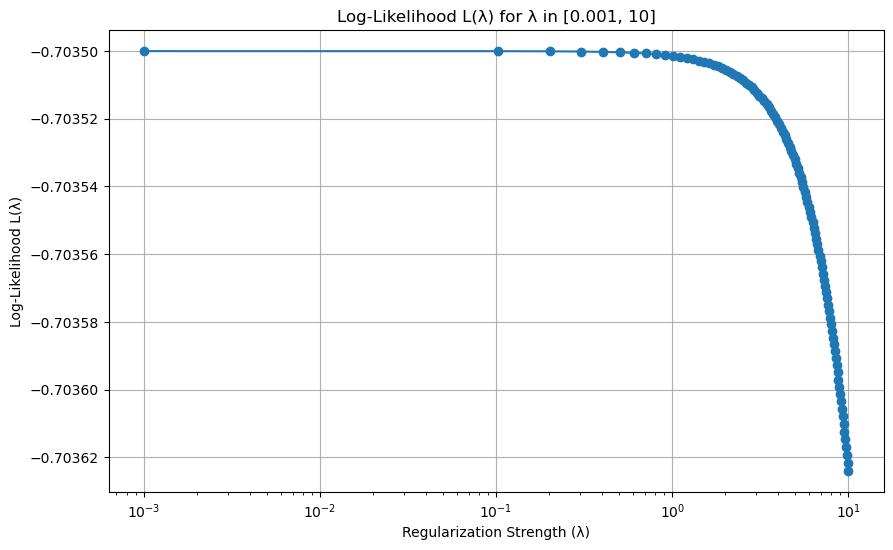

In [2]:
lambda_range = np.linspace(0.001, 10, 100)
C_values = 1 / lambda_range

# Placeholder for log-likelihood values
log_likelihoods = []

for C in C_values:
    # Train logistic regression model with current C (inverse of lambda)
    clf = LogisticRegression(C=C, multi_class='multinomial', solver='lbfgs', random_state=0)
    clf.fit(X, y)
    
    # Predict log probabilities
    log_prob = clf.predict_log_proba(X)

    
    
    
    # Calculate log-likelihood for the current model
    log_likelihood = np.sum(log_prob[np.arange(log_prob.shape[0]), y]) / len(y)
    log_likelihoods.append(log_likelihood)

# Plotting

plt.figure(figsize=(10, 6))
plt.plot(lambda_range, log_likelihoods, marker='o')
plt.xlabel('Regularization Strength (λ)')
plt.ylabel('Log-Likelihood L(λ)')
plt.title('Log-Likelihood L(λ) for λ in [0.001, 10]')
plt.xscale('log')  # Using log scale for lambda
plt.grid(True)
plt.show()

When the $\lambda\$ increase the log-likelihood drop

**(b)** (10 marks) Consider the following regularized empirical risk minimization problem for learning a neural network $f(\bfx; \bfw, b)$ with weights $\bfw$ and biases $b$:
\begin{align}
	\min_{\bfw, b}
	\Bigl(\sum_{i=1}^n L(y_{i}, f(\bfx_{i}; \bfw, b)) 
     +
	\lambda ||\bfw||_2^2\Bigr),
\end{align}
where $\lambda > 0$.
Prove that there exists an $r \ge 0$,
such that any minimizer of the following constrained problem is a minimizer of the regularized problem:
\begin{align}
	&\qquad \min_{\bfw, b} 
	\sum_{i=1}^n L(y_{i}, f(\bfx_{i}; \bfw, b)) \\
	\text{s.t.} &\qquad ||\bfw||_{2} \le r. 
\end{align}

**Answer.** 


#### Step 1: Choosing $r$

Let $(\mathbf{w}^*, b^*)$ be a minimizer of the regularized problem. We can choose $r = \|\mathbf{w}^*\|_2$. This choice of $r$ ensures that $(\mathbf{w}^*, b^*)$ is feasible for the constrained problem, as it satisfies the constraint $\|\mathbf{w}\|_2 \leq r$.

#### Step 2: Proving Minimization

Now, suppose there exists a solution $(\mathbf{w}', b')$ to the constrained problem with $\|\mathbf{w}'\|_2 \leq r$ that achieves a lower objective value in the constrained problem than $(\mathbf{w}^*, b^*)$. This would mean:

$$
\sum_{i=1}^{n} L(y_i, f(\mathbf{x}_i;\mathbf{w}',b')) < \sum_{i=1}^{n} L(y_i, f(\mathbf{x}_i;\mathbf{w}^*,b^*)).
$$

However, since $(\mathbf{w}^*, b^*)$ is a minimizer of the regularized problem, and $\|\mathbf{w}'\|_2 \leq r = \|\mathbf{w}^*\|_2$, it follows that:

$$
\sum_{i=1}^{n} L(y_i, f(\mathbf{x}_i;\mathbf{w}',b')) + \lambda \|\mathbf{w}'\|_2^2 \geq \sum_{i=1}^{n} L(y_i, f(\mathbf{x}_i;\mathbf{w}^*,b^*)) + \lambda \|\mathbf{w}^*\|_2^2.
$$

This implies that $(\mathbf{w}', b')$ cannot achieve a lower objective value in the constrained problem without also achieving a lower value in the regularized problem, which contradicts the assumption that $(\mathbf{w}^*, b^*)$ is a minimizer of the regularized problem.

## Conclusion

Therefore, by choosing $r = \|\mathbf{w}^*\|_2$, we ensure that any minimizer of the constrained problem with $\|\mathbf{w}\|_2 \leq r$ is also a minimizer of the regularized problem. This completes the proof.


**(c)** (10 marks) A common trick to prevent a model from overfitting to the training data is to augment the training set with perturbed training examples.
This is a technique that is particularly commonly used for training large neural networks.
In this problem, you will show that for linear regression, perturbing examples with Gaussian noise plays is equivalent to performing $\ell_{2}$ regularization (when there are unlimited examples).

Specifically, let $(\bfx, y) \in \reals^{d} \times \reals$ denote a random example sampled from the underlying data distribution.
Let $\bfx' = \bfx + \epsilon$ be the perturbed example obtained by adding to $\bfx$ with a scaled $d$-dimensional standard Gaussian noise 
$\epsilon \sim N(0, \sigma^{2} I_{d})$, where $I_{d}$ is the $d \times d$ idenity matrix.
Prove the following equation:
\begin{align*}
    \E (\beta^{\top} \bfx' - y)^{2}
    &=
    \E (\beta^{\top} \bfx - y)^{2} + \sigma^{2} \|\beta\|_{2}^{2}.
\end{align*}

**Answer.**

First, we expand $\E (\beta^\top \mathbf{x}' - y)^2$:
$$
\E (\beta^\top (\mathbf{x} + \epsilon) - y)^2 = \E ((\beta^\top \mathbf{x} - y) + \beta^\top \epsilon)^2
$$
This can be further expanded to:
$$
\E ((\beta^\top \mathbf{x} - y)^2 + 2(\beta^\top \mathbf{x} - y)(\beta^\top \epsilon) + (\beta^\top \epsilon)^2)
$$


The expectation of the cross term $2(\beta^\top \mathbf{x} - y)(\beta^\top \epsilon)$ is 0 because $\epsilon$ has a mean of 0 and is independent of $\mathbf{x}$ and $y$. Thus, we have:
$$
\E ((\beta^\top \mathbf{x} - y)^2) + \E ((\beta^\top \epsilon)^2)
$$
We know that $$
\text{Var}[X] = \mathbb{E}[(X - \mathbb{E}[X])^2] = \mathbb{E}[X^2] - (\mathbb{E}[X])^2
$$
is true

Since $\epsilon \sim N(0, \sigma^2 I_d)$, the variance of $\beta^\top \epsilon$ is:
$$
\text{Var}(\beta^\top \epsilon) = \beta^\top (\sigma^2 I_d) \beta = \sigma^2 \|\beta\|_2^2
$$
Given that the mean of $\epsilon$ is 0, the expectation $\E ((\beta^\top \epsilon)^2)$ is simply the variance of $\beta^\top \epsilon$, which is $\sigma^2 \|\beta\|_2^2$.


Combining the results from Steps 2 and 3, we get:
$$
\E ((\beta^\top \mathbf{x} - y)^2) + \sigma^2 \|\beta\|_2^2.
$$


Hence, we have shown that:
$$
\E (\beta^\top \mathbf{x}' - y)^2 = \E (\beta^\top \mathbf{x} - y)^2 + \sigma^2 \|\beta\|_2^2.
$$



## Q2. Statistical learning theory (10 marks)

In practice, we often see that the training set performance is better than the
test set performance.
In this question, we prove that indeed, on average, we obtain better training set
error than test set error.
Formally, let $(x_{1}, y_{1}), \ldots, (x_{n}, y_{n})$ be a random i.i.d. training
set, and 
$(x'_{1}, y'_{1}), \ldots, (x'_{m}, y'_{m})$ be a random i.i.d. test set, both drawn
from the same distribution $P(X, Y)$.
Let $\hat{f}$ be the empirical risk minimizer on the training set, and 
\begin{align} 
    R_{tr}(\hat{f}) &= \frac{1}{n} \sum_{i} L(x_{i}, y_{i}, \hat{f}), \\
    R_{ts}(\hat{f}) &= \frac{1}{m} \sum_{i} L(x'_{i}, y'_{i}, \hat{f}),
\end{align}
Prove that 
\begin{align}
    \mathbb{E} R_{tr}(\hat{f}) \le \mathbb{E} R_{ts}(\hat{f}),
\end{align}
where the expectation is taken wrt both the training set and the test set.

**Answer**.
In training, our model aim to minimize the training error from various error measure, For example, if we use MSE the expect error is \begin{align}\underbrace{\mathbb{E}\left[(Y' - Y)^2\right]}_{\text{Expected Prediction Error}} = \underbrace{\mathbb{E}\left[(Y' - \mathbb{E}[Y'])^2\right]}_{\text{Variance}} + \underbrace{\left(\mathbb{E}[Y'] - \mathbb{E}[Y]\right)^2}_{\text{Bias (squared)}} + \underbrace{\mathbb{E}\left[(Y - \mathbb{E}[Y])^2\right]}_{\text{Irreducible Noise}},
\end{align}


## Q3. Animals Are All You Need (65 marks)

We will use some simple labeled animal images to study a number of ideas that we have covered in this course.

The data consists of a training set and four different test sets stored in the file `animals.pkl`. The images in the training set are clean animal images, while those in the test sets are transformed animal images. The code below shows how you can load the data. A few example images are shown.

image size = (80, 80) ; max value = 1.0 ; min value = 0.0
training examples


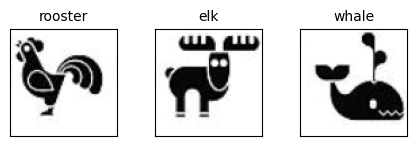

test set rot - randomly rotated images


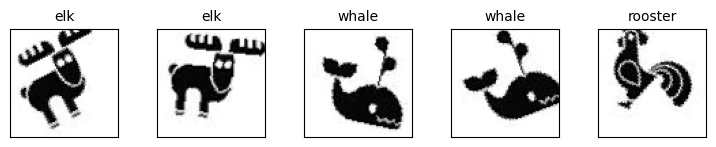

test set cut - one quadrant cut off


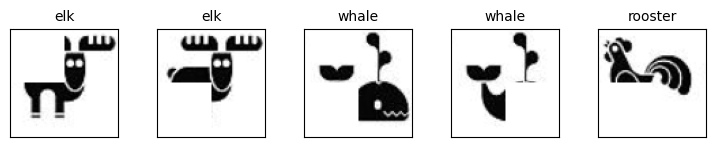

test set p4 - each pixel value v flipped to 1-v with probability 0.4


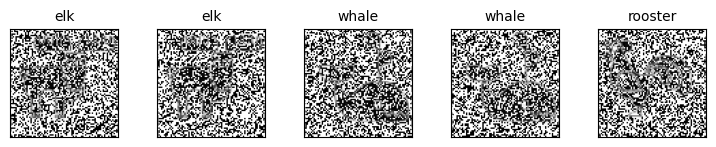

test set p6 - each pixel value v flipped to 1-v with probability 0.6


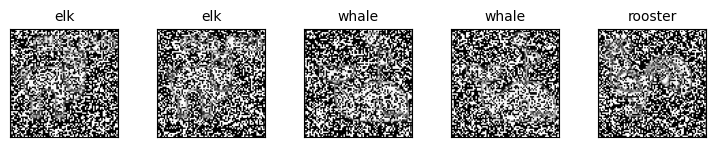

In [3]:
from util import *
import pickle as pkl

animals = pkl.load(open('animals.pkl', 'rb'))

image = animals['x_tr'][0]
print('image size =', image.shape, '; max value =', image.max(), '; min value =', image.min())

print('training examples')
x_tr, y_tr = animals['x_tr'], animals['y_tr']
plot_gallery(animals['x_tr'], titles=animals['y_tr'])

print('test set rot - randomly rotated images')
x_ts_rot, y_ts_rot = animals['x_ts_rot'], animals['y_ts_rot']
plot_gallery(animals['x_ts_rot'][:5], titles=animals['y_ts_rot'][:5])

print('test set cut - one quadrant cut off')
x_ts_cut, y_ts_cut = animals['x_ts_cut'], animals['y_ts_cut']
plot_gallery(x_ts_cut[:5], titles=y_ts_cut[:5])

print('test set p4 - each pixel value v flipped to 1-v with probability 0.4')
x_ts_p4, y_ts_p4 = animals['x_ts_p4'], animals['y_ts_p4']
plot_gallery(x_ts_p4[:5], titles=y_ts_p4[:5])

print('test set p6 - each pixel value v flipped to 1-v with probability 0.6')
x_ts_p6, y_ts_p6 = animals['x_ts_p6'], animals['y_ts_p6']
plot_gallery(x_ts_p6[:5], titles=y_ts_p6[:5])

### I. Logistic regression and Naive Bayes (10 marks)

**(a)** (8 marks) Train a logistic regression model using the three training examples, and report the model's classification accuracy on the training set and the four test sets. Briefly describe the model's performance. In addition, reshape the `coef_` variable of the model as as 3x80x80 array and plot it as 3 images, then provide a brief explanation for the model's performance.

**Answer.** 

In [4]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

x_flat = x_tr.reshape(x_tr.shape[0],-1) #3,6400

q3_clf = LogisticRegression(random_state = 0).fit(x_flat,y_tr)
print(x_flat.shape,y_tr.shape)

(3, 6400) (3,)


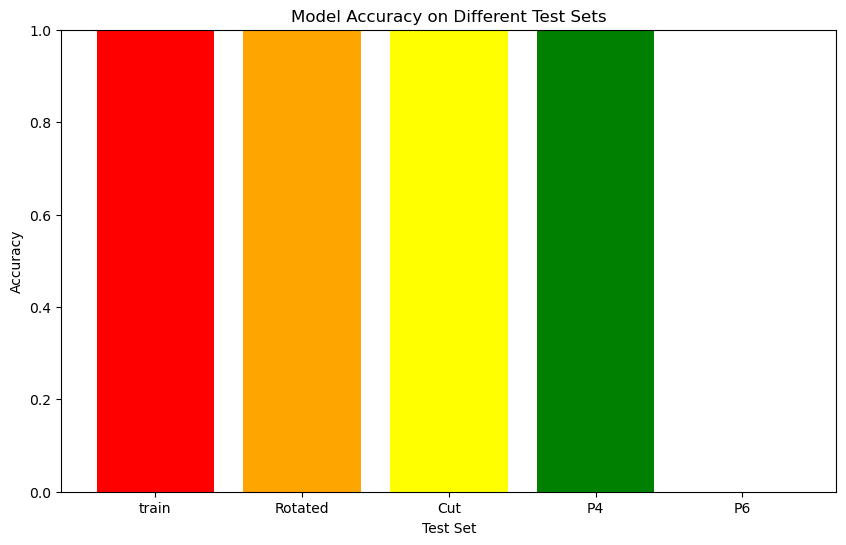

In [5]:
rot_flat = x_ts_rot.reshape(x_ts_rot.shape[0],-1)
cut_flat = x_ts_cut.reshape(x_ts_cut.shape[0],-1)
x_ts_p4_flat = x_ts_p4.reshape(x_ts_p4.shape[0],-1)
x_ts_p6_flat = x_ts_p6.reshape(x_ts_p6.shape[0],-1)

train_acc = np.mean(q3_clf.predict(x_flat)==y_tr)
rot_acc = np.mean(q3_clf.predict(rot_flat)==y_ts_rot)
cut_acc = np.mean(q3_clf.predict(cut_flat)==y_ts_cut)
p4_acc = np.mean(q3_clf.predict(x_ts_p4_flat)==y_ts_p4)
p6_acc = np.mean(q3_clf.predict(x_ts_p6_flat)==y_ts_p6)


test_sets = ["train",'Rotated', 'Cut', 'P4', 'P6']

accuracy = [train_acc,rot_acc, cut_acc, p4_acc, p6_acc]

plt.figure(figsize=(10, 6))
plt.bar(test_sets, accuracy, color=["red","orange","yellow","green","blue"])
plt.xlabel('Test Set')
plt.ylabel('Accuracy')
plt.title('Model Accuracy on Different Test Sets')
plt.ylim(0, 1)  # Assuming accuracy scores are between 0 and 1
plt.show()

We can see that in train,rotation,cut and P4 test set, we all achieve 100% accuracy, but we get 0% accuracy in P6. It is probably due to the flip probability exceed 0.5 in P6. In other datasets, pictures are shown in black pixel(value1) but in P6 picutre are shown in pixel white so our model cannot recognize it.

**(b)** (2 marks) Train a Naive Bayes model using the three training examples, and report the model's classification accuracy on the training set and the four test sets. Compare the Naive Bayes classifier's performance with that of logistic regression.

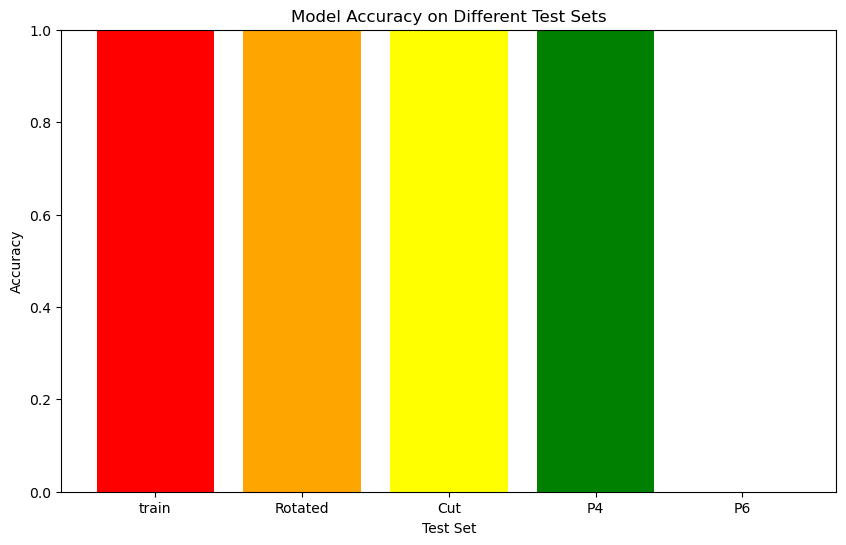

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
nb_clf =  GaussianNB().fit(x_flat,y_tr)

score_train_nb = nb_clf.score(x_flat, y_tr)
score_rot_nb = nb_clf.score(rot_flat, y_ts_rot)
score_cut_nb = nb_clf.score(cut_flat, y_ts_cut)
score_p4_nb = nb_clf.score(x_ts_p4_flat, y_ts_p4)
score_p6_nb = nb_clf.score(x_ts_p6_flat, y_ts_p6)


# Naive Bayes scores
scores_nb = [score_rot_nb, score_cut_nb, score_p4_nb, score_p6_nb]

plt.figure(figsize=(10, 6))
plt.bar(test_sets, accuracy, color=["red","orange","yellow","green","blue"])
plt.xlabel('Test Set')
plt.ylabel('Accuracy')
plt.title('Model Accuracy on Different Test Sets')
plt.ylim(0, 1)  # Assuming accuracy scores are between 0 and 1
plt.show()


basically we got the smae result as logistic regression.

### II. PCA (25 marks)

**(c)** (5 marks) Perform PCA on the training set with 2 principal components only. Use the `explained_variance_ratio_` variable in `sklearn.decomposition.PCA` to compute the proportion of variance accounted by the 2 principal components.

**Answer.**

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(x_flat)
print(pca.explained_variance_ratio_)
pca

[0.59763695 0.40236305]


PCA(n_components=2)

**(d)** (5 marks) Use `plot_gallery` to plot the two principal components by reshaping them as images of the same shape as the training images. Describe the principal component images in relation to the training images.

**Answer.**

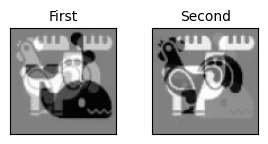

In [14]:
components = pca.components_

component_images = components.reshape((2,80, 80))
plot_gallery(component_images, ['First' , 'Second'])



we can see three animal in one pricipal at the same time. Because first and second pricipal have major variance in this dataset, we can recognize the picture easily. If we print the third principal, we cannot see any information in it.

(3, 6400)


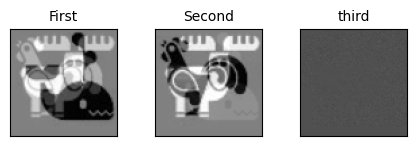

In [23]:
pca3 = PCA(n_components=3).fit(x_flat)
components = pca3.components_

component_images = components.reshape((3,80, 80))
plot_gallery(component_images, ['First' , 'Second',"third"])


**(e)** (5 marks) Use the above PCA model to compute 2D projections of the training set and the `rot` test set. Construct a scatter plot of these projections. You may find the [API](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) for `matplotlib.pyplot.scatter` helpful. Use different colors for different animals, and visually distinct markers for the training examples (e.g., use `marker='o'` for the training examples and `marker='+'` for the test examples). Describe how rotation affects the 2D projections of the animal images.

**Answer.**

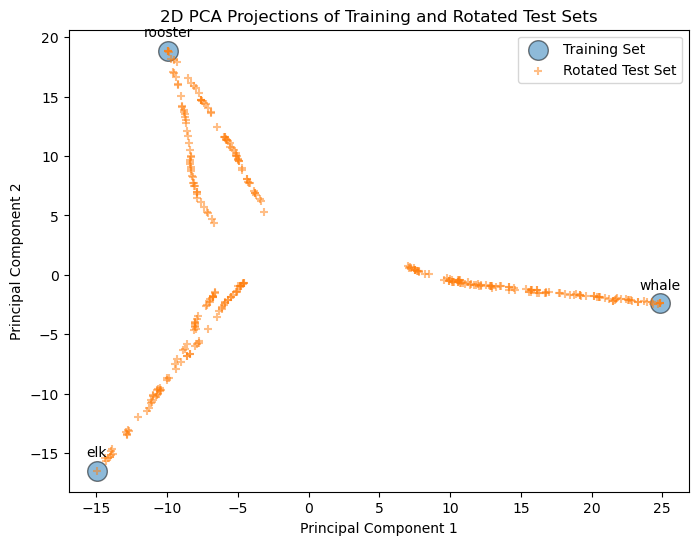

In [19]:
import matplotlib.pyplot as plt
train_2D = pca.transform(x_flat)
rot_2D = pca.transform(rot_flat)

plt.figure(figsize=(8, 6))
plt.scatter(train_2D[:, 0], train_2D[:, 1], alpha=0.5, label='Training Set', edgecolor='k',s=200)
for i, label in enumerate(y_tr):
    plt.annotate(label, (train_2D[i, 0], train_2D[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')
plt.scatter(rot_2D[:, 0], rot_2D[:, 1], alpha=0.5, label='Rotated Test Set',marker = "+")
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projections of Training and Rotated Test Sets')
plt.show()

Rotate dataset decrease the difference in each categories we can see that in the chart. We can see that most of the whales data point remain in the same line but rooster and elk are divided into 2 streams.

**(f)** (5 marks) Train a logistic regression classifier using the 2D projections as features, and report the model's classification accuracy on the training set and the four test sets. How does this classifier compare with the logistic regression classifier trained on the original dataset?

**Answer.**

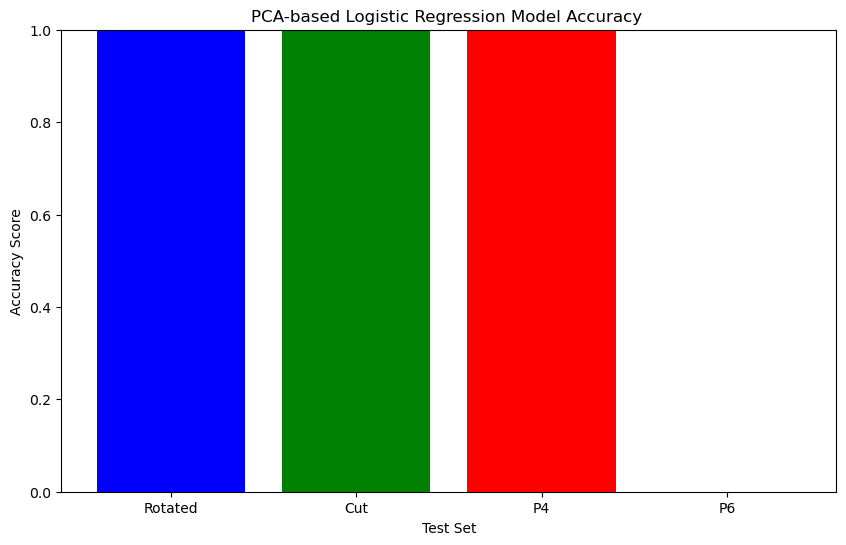

In [17]:
from sklearn.linear_model import LogisticRegression
pca_reg = LogisticRegression()  
pca_reg.fit(train_2D, y_tr)

# rot_2D = pca.transform(rot_flat)
cut_2D = pca.transform(cut_flat)
p4_2D = pca.transform(x_ts_p4_flat)
p6_2D = pca.transform(x_ts_p6_flat)

score_rot_pca = pca_reg.score(rot_2D,y_ts_rot)
score_cut_pca =pca_reg.score(cut_2D,y_ts_cut)
score_p4_pca =pca_reg.score(p4_2D,y_ts_p4)
score_p6_pca =pca_reg.score(p6_2D,y_ts_p6)

test_sets = ['Rotated', 'Cut', 'P4', 'P6']
scores = [score_rot_pca, score_cut_pca, score_p4_pca, score_p6_pca]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(test_sets, scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Test Set')
plt.ylabel('Accuracy Score')
plt.title('PCA-based Logistic Regression Model Accuracy ')
plt.ylim(0, 1)  # Assuming accuracy scores are between 0 and 1
# for i, score in enumerate(scores):
#     plt.text(i, score + 0.02, f"{score:.2f}", ha = 'center')
plt.show()

we get the same result compared to logistic model.

**(g)** (5 marks) Use the above PCA model to first project the first 5 images in the `p4` test set, then reconstruct the images from the projections. Plot both the original images and the reconstructed images. Describe what PCA does based on these images.

**Answer.**

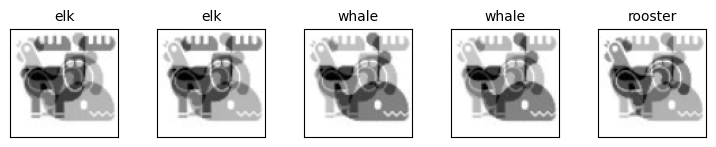

In [35]:
reconstructed_images = pca.inverse_transform(p4_2D)
reconstructed_images = reconstructed_images.reshape(reconstructed_images.shape[0],80,80)
plot_gallery(reconstructed_images[:5], titles=y_ts_p4[:5])

Basically it looks like the principal one and two. We can see that the correct answer is the black pixel part.

### III. MLP (5 marks)

**(h)** (5 marks) Use [sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) to train two MLP classifiers using the three training examples.
The first one should use `random_state=11` and the second one should use `random_state=131`. 
In addition, use the following hyperparameters for both classifiers:
* The MLP has a single hidden layer with 10 hidden neurons using the sigmoid (or logistic) activation.
* Use a constant learning rate of 0.001.
* Use at most 1000 iterations.
All other hyperparameters should be their default values in sklearn.

Report both models' classification accuracies on the training set and the four test sets.
If the results are different for both classifiers, explain why.

**Answer.**

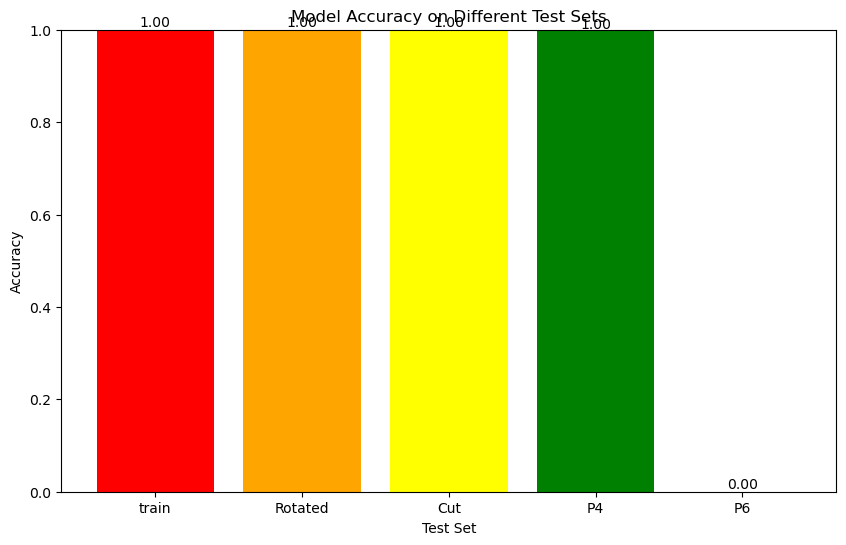

In [39]:
from sklearn.neural_network import MLPClassifier
mlp1 = MLPClassifier(hidden_layer_sizes=10,activation='logistic',learning_rate='constant', learning_rate_init=0.001,max_iter=1000, random_state=11)
mlp2 = MLPClassifier(hidden_layer_sizes=10,activation='logistic',learning_rate='constant', learning_rate_init=0.001,max_iter=1000,random_state=131)

mlp1.fit(x_flat,y_tr)


mlp1_tr = np.mean(mlp1.predict(x_flat)==y_tr)
mlp1_rot = np.mean(mlp1.predict(rot_flat)==y_ts_rot)
mlp1_cut = np.mean(mlp1.predict(cut_flat)==y_ts_cut)
mlp1_p4 = np.mean(mlp1.predict(x_ts_p4_flat)==y_ts_p4)
mlp1_p6 = np.mean(mlp1.predict(x_ts_p6_flat)==y_ts_p6)

test_sets = ["train",'Rotated', 'Cut', 'P4', 'P6']

accuracy = [mlp1_tr,mlp1_rot, mlp1_cut, mlp1_p4, mlp1_p6]

plt.figure(figsize=(10, 6))
bars = plt.bar(test_sets, accuracy, color=["red", "orange", "yellow", "green", "blue"])

# 添加条形图的标题和轴标签
plt.xlabel('Test Set')
plt.ylabel('Accuracy')
plt.title('Model Accuracy on Different Test Sets')

# 设置y轴的范围
plt.ylim(0, 1)

# 在每个条形上方显示精确度数值
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

# 显示图表
plt.show()

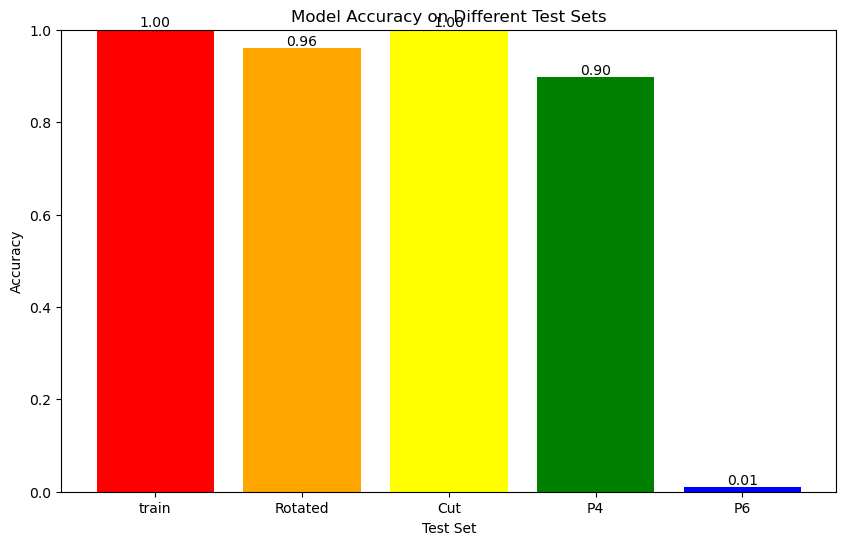

In [41]:
mlp2.fit(x_flat,y_tr)

mlp2_tr = np.mean(mlp2.predict(x_flat)==y_tr)
mlp2_rot = np.mean(mlp2.predict(rot_flat)==y_ts_rot)
mlp2_cut = np.mean(mlp2.predict(cut_flat)==y_ts_cut)
mlp2_p4 = np.mean(mlp2.predict(x_ts_p4_flat)==y_ts_p4)
mlp2_p6 = np.mean(mlp2.predict(x_ts_p6_flat)==y_ts_p6)

test_sets = ["train",'Rotated', 'Cut', 'P4', 'P6']

accuracy = [mlp2_tr,mlp2_rot, mlp2_cut, mlp2_p4, mlp2_p6]

plt.figure(figsize=(10, 6))
bars = plt.bar(test_sets, accuracy, color=["red", "orange", "yellow", "green", "blue"])


plt.xlabel('Test Set')
plt.ylabel('Accuracy')
plt.title('Model Accuracy on Different Test Sets')


plt.ylim(0, 1)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')


plt.show()

In first model, the result remain in same with otehr model we've done. However, in the model 2 we finally see something different.
Generally speaking, model2 is the only one which can achieve correct classification in p6 and it is probably due to its model complexity.

### IV. Hopfield networks (25 marks)

**(i)** (15 marks) Implement a Hopfield network by filling in the code below according to the comments. Note the following:
- The network is trained on binary images.
- The network should be able to classify binary images.
- The network should terminate the reconstruction process once the recontructed image does not change any more.

In this question, each binary image is a 2D array with entries being either 0 or 1.

**Answer.**

In [154]:
class HopfieldNet:
    """
    A Hopfield Network class.
    
    Example
    -------
    >>> net = HopfieldNet()
    >>> net.fit(images, labels) # see fit on requirements on images and labels
    >>> print("Training accuracy:", net.score(images, labels))
    """

    def __init__(self):
        pass

    def fit(self, images, labels=None):
        """
        Train a Hopfield network.
        
        Parameters
        ----------
        images: An array of 2D binary images. Each pixel value is either 0 or 1.
        labels: An optional 1D array of labels for the images. Required for classify and score.
        """
        self.images = np.array(images)
        self.labels = labels
        
        
        # Task: add your training code below
        
        num_images = len(self.images)
        self.flat_images = self.images.reshape(num_images, -1)
        
        dim = self.flat_images.shape[1]
        weight = np.zeros((dim, dim))
        
        for i in range(dim):
            for j in range(dim):
                if i != j:
                    for k in range(num_images):
                        weight[i, j] += (self.flat_images[k, i])*(self.flat_images[k, j])
        self.weight = weight
        print(self.weight)

    def predict(self, images, sync=False, niter=100, verbose=False):
        """
        Compute and return the reconstrutions for the given images.
        
        Parameters
        ----------
        images: An array of 2D binary images. Each pixel value is either 0 or 1.
        sync: Use synchrounous update if True, and semi-random update if False.
        niter: Maximum number of iterations used for computing a reconstruction. 
            An iteration involves updating each neuron once. Stop the reconstruction
            process once the patterns do not change any more in an iteration.
        verbose: Print debug messages if set to True. Put any debug message under "if verbose:" block.
        
        Returns
        -------
        reconstructions: an array of reconstructed 2D binary image. Each pixel value is either 0 or 1.
        """
        reconstrutions = []
        
        # Task: modify the code below to compute the reconstructions for all input images
        for image in images:
            prev_flat_image = None 
            flat_image = image.reshape(1,-1).T #n,1
            converged = False
            for i in range(niter): # stop once the reconstruction doesn't change any more
                if sync: # synchronous update
                    flat_image = self.weight @ flat_image
                    flat_image = np.where(flat_image > 0, 1, 0)
                    
                else: # semi-random update
                    rds = np.random.permutation(flat_image.shape[0])
                    for j in rds:
                        flat_image[j] = 1 if self.weight[:,j]@flat_image <0 else 0
                        
                if prev_flat_image is not None and np.array_equal(flat_image, prev_flat_image):
                    converged = True
                    break       
                prev_flat_image = flat_image  
            reconstrutions.append(flat_image)
            
            if verbose:
                if converged:
                    print('converged in %d iteration(s)' % (i+1))
                else:
                    print('update did not converge in %d iteration(s)' % (i+1))

        return np.array(reconstrutions)

    def classify(self, images, **kwargs):
        """
        Classify images. To classify an image, first compute its reconstruction, then predict
        its class to be the reconstruction's nearest training example's label.
        
        Parameters
        ----------
        images: An array of 2D binary images. Each pixel value is either 0 or 1.
        kwargs: These are keyword arguments that are accepted by the predict function.
        
        Returns
        -------
        labels: An array of predicted class labels.
        """
        assert self.labels is not None # labels need to be provided when using fit to train the model

        labels = []
        # Task: add your code to implement the classification method described in the docstring above.
        reconstructions = self.predict(images,sync=False, niter=100, verbose=False)
        
        test = []
       
        for re_pic in reconstructions:
            min_distance = np.inf
            nearest_image_index = -1
            for i,tr_pic in enumerate(self.flat_images):
                distance = np.sum(np.abs(re_pic - tr_pic))
        
                if distance < min_distance:
                    min_distance = distance
                    nearest_image_index = i
            test.append(min_distance)
            labels.append(nearest_image_index)
            
        mapping = {0: "rooster", 1: "elk", 2: "whale"}
        for i in range(len(labels)):
            labels[i] = mapping[labels[i]]
            
        
        return np.array(labels)

    def score(self, images, labels, **kwargs):
        """
        Returns the classification accuracy on the given dataset.
        """
        return np.mean(self.classify(images, **kwargs) == labels)

**(j)** (5 marks) Train a Hopfied network using the training examples. Note that the animal images are non-binary images. You can use the following `binarize` function to convert an array of non-binary images to binary ones.

In [44]:
# binarize an image by setting a pixel value to 1 if it's larger than the mean pixel value, and to 0 otherwise.
def binarize(images): 
    return np.array([(image > np.mean(image)) for image in images])

**Report the Hopfield network's classification accuracies on the training set and the four test sets, and describe how the four transformations affect Hopfield network's classification accuracy. You can set `sync` to either `True` or `False`.**

**Answer.**

In [53]:
bi_x = binarize(x_flat)

In [ ]:
net = HopfieldNet()
net.fit(bi_x,y_tr)


In [ ]:
np.set_printoptions(threshold=np.inf)
print(net.predict(rot_flat,sync=True)[1])


In [153]:
print(net.classify(rot_flat,sync=True))

KeyboardInterrupt: 

In [140]:
rot_flat.shape

(300, 6400)

**(k)** (5 marks) Use the above Hopfield network to perform reconstruction on the first five images from the `p6` test set. What's the relationship between the reconstructed images and the clean images used to form the noisy images in `p6`? Discuss this in relation to the Hopfield network's classification accuracy on `p6` as in (j).

**Answer.**